In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
mnist_df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [148]:
mnist_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
targets = np.array(mnist_df["6"])

In [150]:
features = np.array(mnist_df.drop(columns="6"))

In [151]:
m, n = features.shape
print(f"Training examples: {m}, Example features: {n}")

Training examples: 19999, Example features: 784


Will use logistic regression to build a multiclass classification, using one vs all approach, should be something like turning a specific number into a 1 and the rest of the numbers into a 0, use the pixel values as the features, calculate weights and biases to only recognize that number an then build other n classifiers for the rest of the numbers

In [156]:
class LogisticRegression:
    def __init__(self, features, targets):
        self.X = np.array(features)
        self.m, self.n = np.shape(self.X)
        self.Y = np.array(targets)
        self.W = np.zeros(self.n)
        self.b = 0

    def train(self, iterations, learning_rate):
        errors = []
        for _ in range(iterations):
            logistic_regression_model = self._model()
            Y_pred = self._sigmoid(logistic_regression_model)
            errors.append(self._error(Y_pred))
            dw = (1/self.m)*np.dot(np.transpose(self.X),(Y_pred - self.Y))
            db = (1/self.m)*np.sum(Y_pred - self.Y)
            self.W -= learning_rate * dw
            self.b -= learning_rate * db
        plt.plot(range(iterations), np.array(errors))
        plt.show()

    def _error(self, predictions):
        return np.sum((predictions - self.Y)**2)*(1/(2*self.m))

    def _model(self):
        return np.dot(self.X, self.W) + self.b

    def _sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def predict(self):
        logistic_regression_model = np.dot(self.X, self.W) + self.b
        Y_predicted = self._sigmoid(logistic_regression_model)
        return np.array([1 if i>0.5 else 0 for i in Y_predicted]), Y_predicted

    def accuracy(self):
        accuracy = np.sum(self.Y == self.predict()[0])/len(self.Y)
        return accuracy

Setting up the targets to classify if a number is 0...9 or not


In [157]:
targets_zero = np.array([1 if target == 0 else 0 for target in targets])
targets_one = np.array([1 if target == 1 else 0 for target in targets])
targets_two = np.array([1 if target == 2 else 0 for target in targets])
targets_three = np.array([1 if target == 3 else 0 for target in targets])
targets_four = np.array([1 if target == 4 else 0 for target in targets])
targets_five = np.array([1 if target == 5 else 0 for target in targets])
targets_six = np.array([1 if target == 6 else 0 for target in targets])
targets_seven = np.array([1 if target == 7 else 0 for target in targets])
targets_eight = np.array([1 if target == 8 else 0 for target in targets])
targets_nine = np.array([1 if target == 9 else 0 for target in targets])

Creating instances of the binary classifiers

In [158]:
classifier_zero = LogisticRegression(features, targets_zero)
classifier_one = LogisticRegression(features, targets_one)
classifier_two = LogisticRegression(features, targets_two)
classifier_three = LogisticRegression(features, targets_three)
classifier_four = LogisticRegression(features, targets_four)
classifier_five = LogisticRegression(features, targets_five)
classifier_six = LogisticRegression(features, targets_six)
classifier_seven = LogisticRegression(features, targets_seven)
classifier_eight = LogisticRegression(features, targets_eight)
classifier_nine = LogisticRegression(features, targets_nine)

Training all binary classifiers

<ipython-input-156-32a91a3bcb04>:29: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


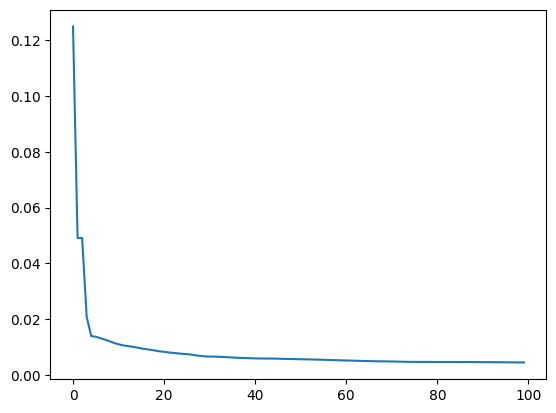

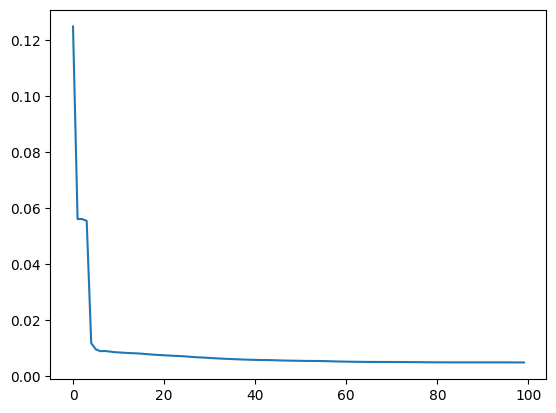

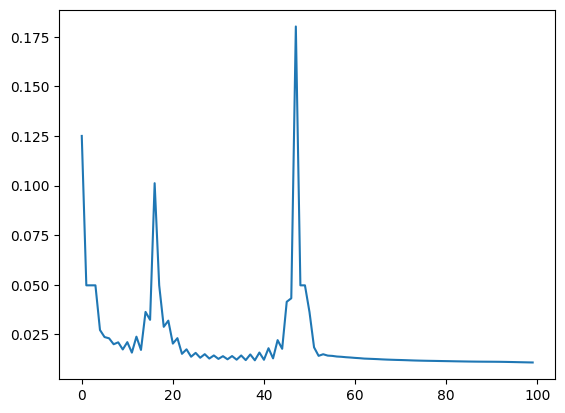

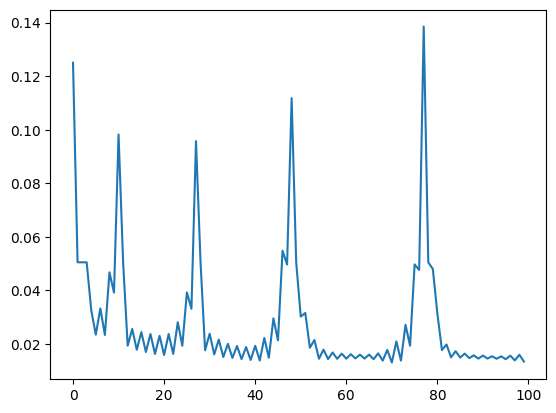

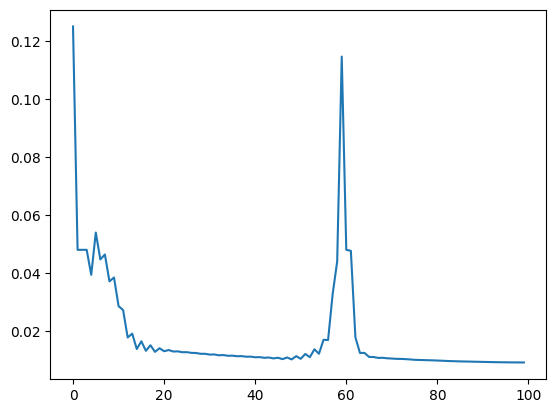

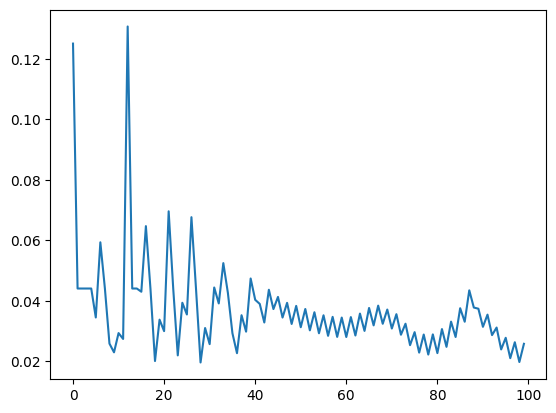

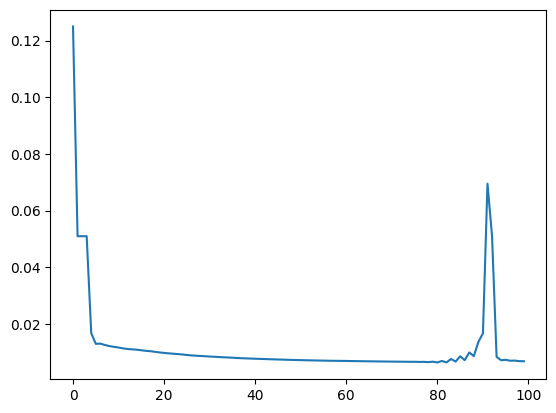

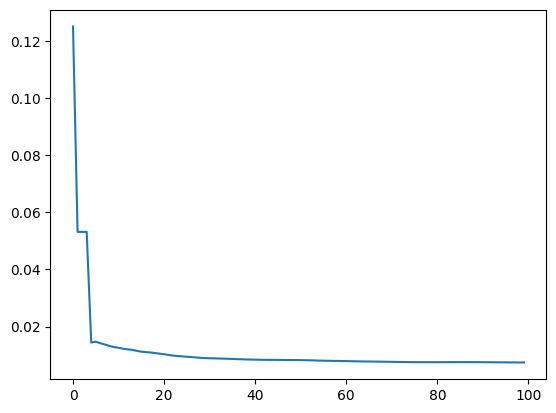

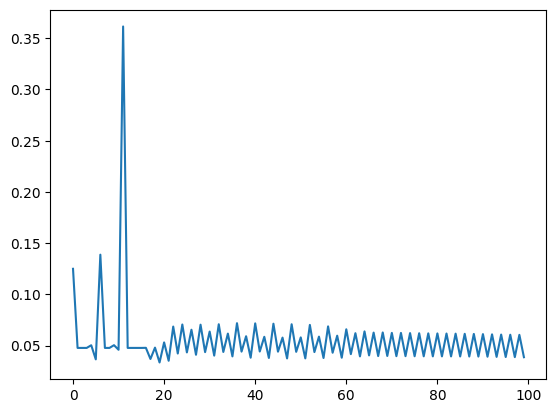

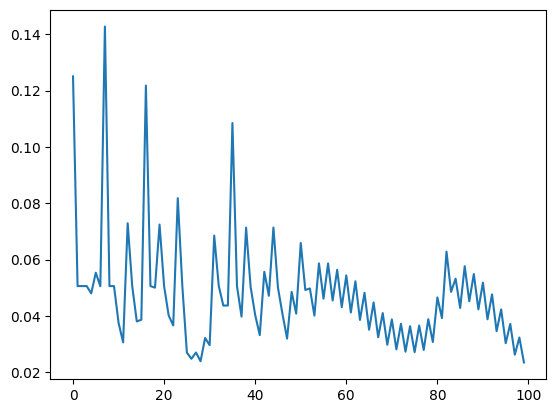

In [159]:
classifier_zero.train(100, 0.001)
classifier_one.train(100, 0.001)
classifier_two.train(100, 0.001)
classifier_three.train(100, 0.001)
classifier_four.train(100, 0.001)
classifier_five.train(100, 0.001)
classifier_six.train(100, 0.001)
classifier_seven.train(100, 0.001)
classifier_eight.train(100, 0.001)
classifier_nine.train(100, 0.001)

Took around 3 minutes to train all binary classifiers and reached and accuracy of: 84% -> 99%

I believe the 84% messed my final result of accuracy, training will be 1000 iterations trying to improve accuracy, if too slow will try to run each training in a separate process.

In [128]:
classifier_zero.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.9883494174708736

In [129]:
classifier_one.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.9869993499674984

In [130]:
classifier_two.accuracy()

0.9794489724486224

In [131]:
classifier_three.accuracy()

0.9690484524226212

In [132]:
classifier_four.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.9790989549477473

In [133]:
classifier_five.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.9587979398969948

In [134]:
classifier_six.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.9850492524626231

In [135]:
classifier_seven.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.9829991499574978

In [136]:
classifier_eight.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.8789939496974849

In [137]:
classifier_nine.accuracy()

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


0.927846392319616

I need something like the python max function but that keeps info of the index of the max value within a list/tuple/set.

I will build a max function that will keep track of the zipped probabilites and it will return the number with higher probability.

In [121]:
def number_probability(zero, one, two, three, four, five, six, seven, eight, nine):
  max_prob = max((zero, one, two, three, four, five, six, seven, eight, nine))
  if max_prob == zero:
    return 0
  if max_prob == one:
    return 1
  if max_prob == two:
    return 2
  if max_prob == three:
    return 3
  if max_prob == four:
    return 4
  if max_prob == five:
    return 5
  if max_prob == six:
    return 6
  if max_prob == seven:
    return 7
  if max_prob == eight:
    return 8
  if max_prob == nine:
    return 9

In [138]:
_, probabilities_zero = classifier_zero.predict()
_, probabilities_one = classifier_one.predict()
_, probabilities_two = classifier_two.predict()
_, probabilities_three = classifier_three.predict()
_, probabilities_four = classifier_four.predict()
_, probabilities_five = classifier_five.predict()
_, probabilities_six = classifier_six.predict()
_, probabilities_seven = classifier_seven.predict()
_, probabilities_eight = classifier_eight.predict()
_, probabilities_nine = classifier_nine.predict()
final_predictions = []
for item in zip(probabilities_zero, probabilities_one, probabilities_two, probabilities_three, probabilities_four, probabilities_five, probabilities_six, probabilities_seven, probabilities_eight, probabilities_nine):
  final_predictions.append(number_probability(*item))
final_predictions = np.array(final_predictions)

<ipython-input-44-5d0a37b8b41f>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


In [123]:
def accuracy(targets, final_predictions):
    accuracy = np.sum(targets == final_predictions)/len(targets)
    return accuracy

In [139]:
accuracy(targets, final_predictions)

0.8665933296664833